In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd 
import math
import datetime
import platform

In [3]:
print('Python version:', platform.python_version())
print('TensorFlow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.12.4
TensorFlow version: 2.18.0
Keras version: 3.9.0


In [4]:
!rm -rf ./ ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [6]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [7]:
(_,IMAGE_WIDTH, IMAGE_HEIGHT)=x_train.shape
IMAGE_CHANNELS=1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [8]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


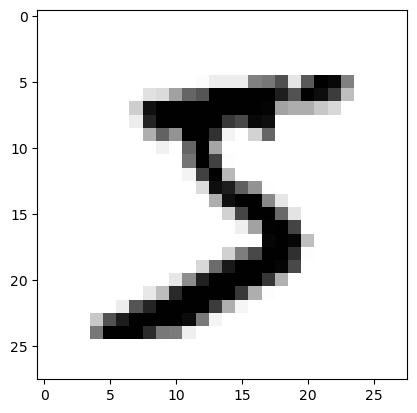

In [9]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

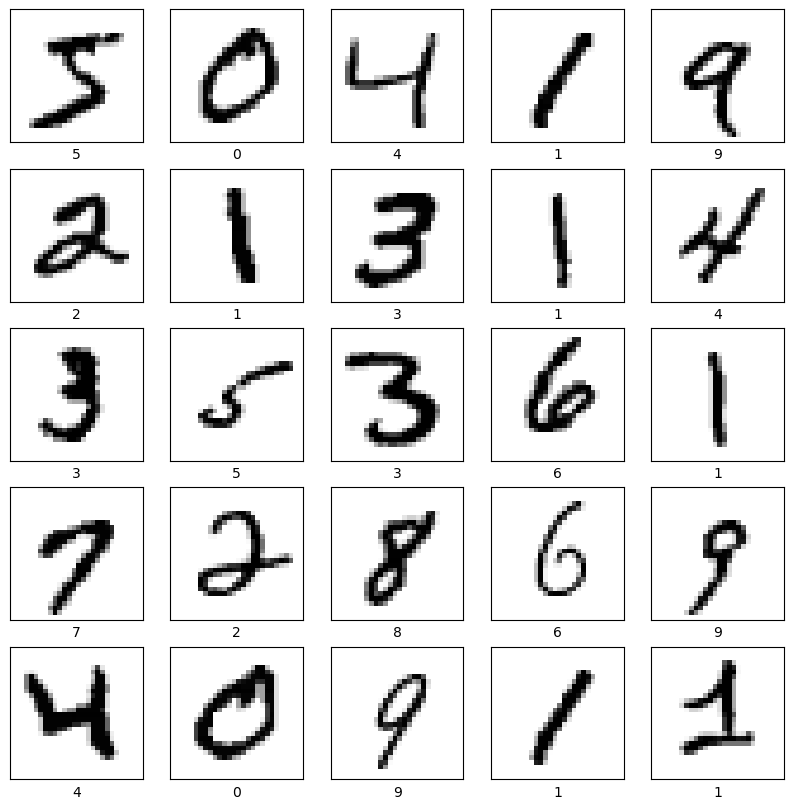

In [10]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [11]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [12]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:',x_test_with_chanels.shape)


x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [13]:
x_train_normalized = x_train_with_chanels/255
x_test_normalized = x_test_with_chanels/255

In [14]:
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [15]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0,2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#pip install pydot

In [18]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [19]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)    

In [20]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history=model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test,y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8289 - loss: 4.1033 - val_accuracy: 0.9556 - val_loss: 0.1777
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9582 - loss: 0.1611 - val_accuracy: 0.9655 - val_loss: 0.1350
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9721 - loss: 0.1007 - val_accuracy: 0.9730 - val_loss: 0.0996
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9795 - loss: 0.0694 - val_accuracy: 0.9745 - val_loss: 0.0934
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9812 - loss: 0.0659 - val_accuracy: 0.9800 - val_loss: 0.0758
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9846 - loss: 0.0517 - val_accuracy: 0.9840 - val_loss: 0.0651
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0391 - val_accuracy: 0.9833 - val_loss: 0.0605
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0410 - 

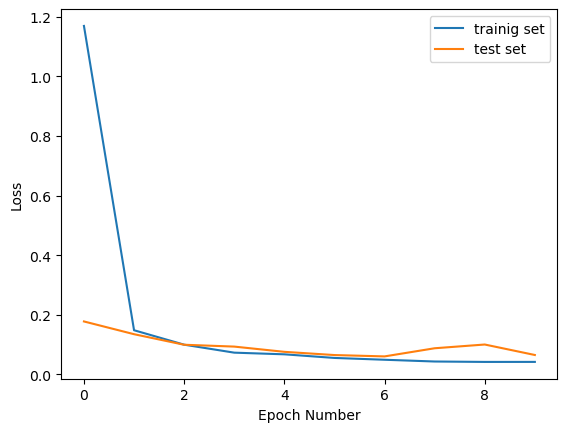

In [21]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='trainig set')
plt.plot(training_history.history['val_loss'],label='test set')
plt.legend()

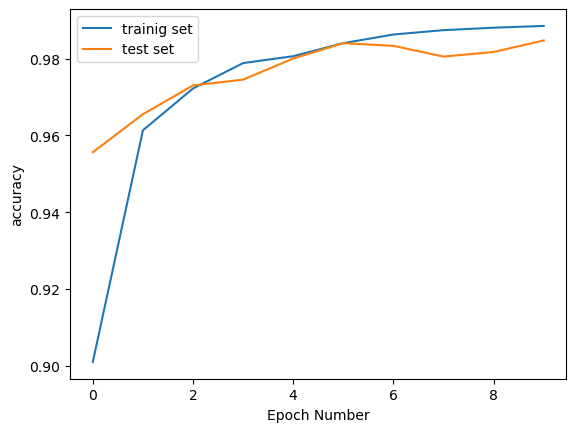

In [22]:
plt.xlabel('Epoch Number')
plt.ylabel('accuracy')
plt.plot(training_history.history['accuracy'], label='trainig set')
plt.plot(training_history.history['val_accuracy'],label='test set')
plt.legend()

In [23]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized,y_train)

In [24]:
print('Training loss:',train_loss)
print('Training accuracy:',train_accuracy)

Training loss: 2.3074467182159424
Training accuracy: 0.09751666337251663


In [25]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized,y_test)

In [26]:
print('validation loss:',validation_loss)
print('validation accuracy:',validation_accuracy)

validation loss: 2.3079030513763428
validation accuracy: 0.09740000218153


In [27]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [28]:
loaded_model= tf.keras.models.load_model(model_name)

In [29]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

  1/313 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [30]:
print('predictions_one_hot:',predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [31]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,0.111684,0.112890,0.082205,0.095110,0.100228,0.086226,0.079044,0.105549,0.140930,0.086136
1,0.111140,0.111334,0.083912,0.096708,0.099621,0.086568,0.079707,0.103120,0.141192,0.086699
2,0.107996,0.114279,0.084402,0.097335,0.100656,0.087523,0.079440,0.103793,0.138224,0.086353
3,0.111145,0.113068,0.083229,0.096054,0.099241,0.086496,0.079712,0.103206,0.140815,0.087034
4,0.109362,0.111629,0.083118,0.095825,0.102808,0.087393,0.079468,0.103660,0.139608,0.087130
...,...,...,...,...,...,...,...,...,...,...
9995,0.111654,0.112021,0.084457,0.096125,0.099633,0.086515,0.080290,0.103255,0.139235,0.086815
9996,0.109686,0.112285,0.084292,0.097783,0.099560,0.087087,0.079509,0.103748,0.139413,0.086638
9997,0.108658,0.112707,0.082927,0.096243,0.101673,0.087593,0.080130,0.102360,0.140192,0.087518
9998,0.108668,0.112845,0.082975,0.098103,0.099325,0.087411,0.078825,0.103039,0.141944,0.086865


In [64]:
predictions = np.argmax(predictions_one_hot,axis=1)

In [66]:
pd.DataFrame(predictions)

,0
0,8
1,8
2,8
3,8
4,8
...,...
9995,8
9996,8
9997,8
9998,8


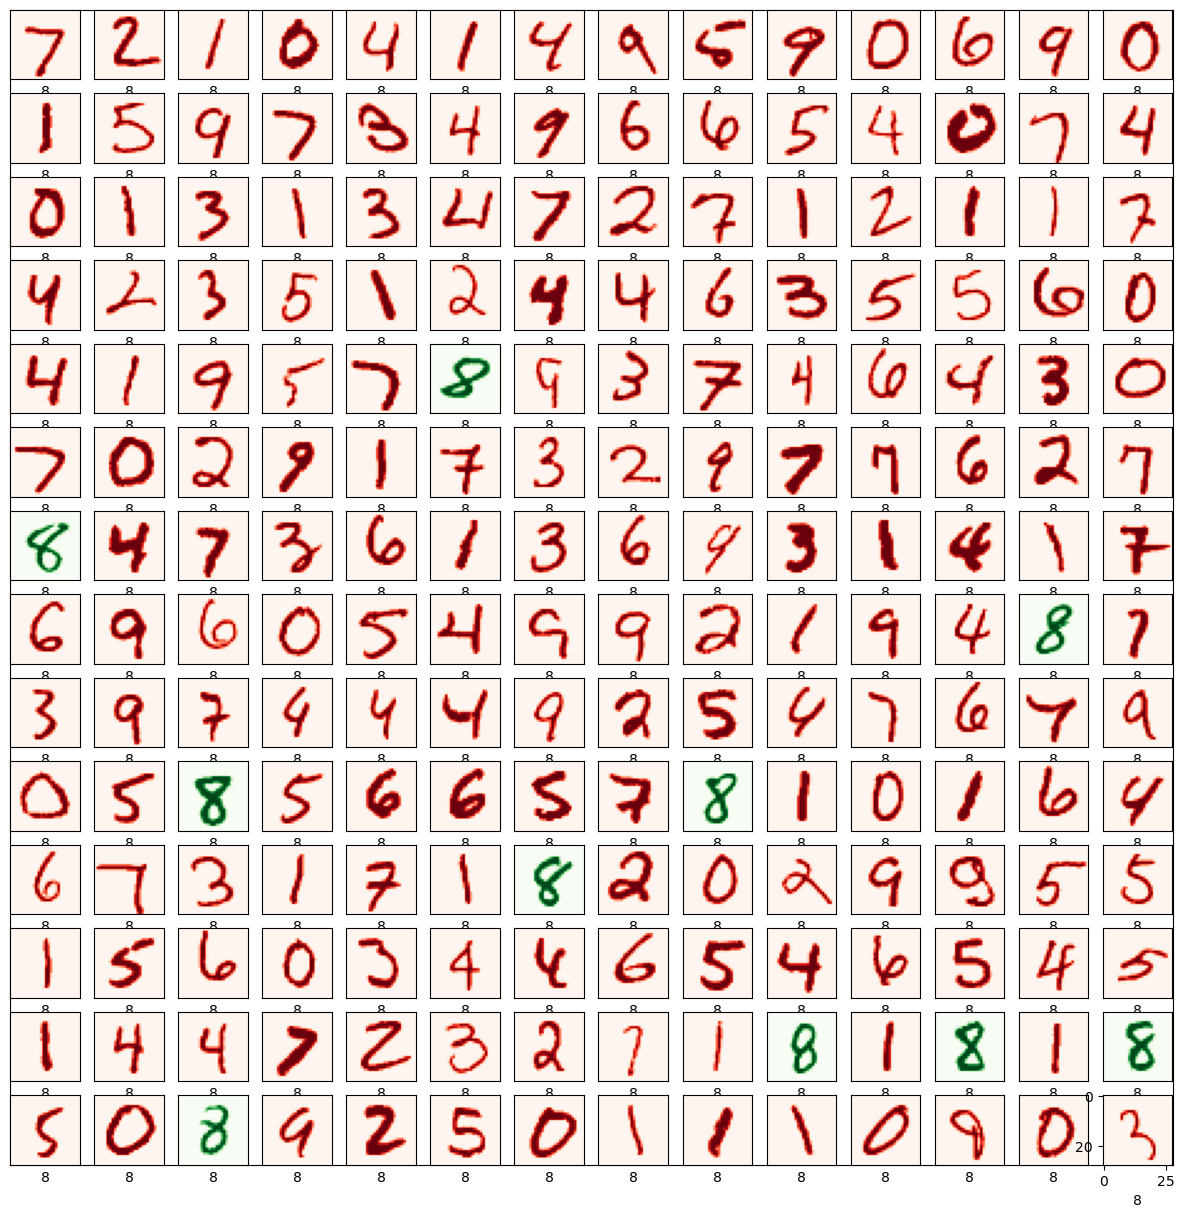

In [68]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map='Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.show()